In [775]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
import pydot

# In this analysis we will use the Pima Indians Diabetes dataset and formed a binary classification problem.
Our main goal in this analysis is to predict the outcome of a patient using the following predictors: Pregnancies, Glucose, Bloodoressure, SkinThicvkness, Insulin, BMI DiabetesPedigreeFunctiomn and Age.
The column "Outcome" here represent our target, if the outcome is 1 the patient has been diagnosticated with diabates and if 0 the result of the diagnosis was negatif.

In [801]:
#load the data
dataset_url = 'https://raw.githubusercontent.com/purva91/Bias_Variance_Knn/master/diabetes.csv'
data = pd.read_csv(dataset_url)

In [802]:
#Check the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [803]:
#get more info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [804]:
#Important metrics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [805]:
#shape of the data
data.shape

(768, 9)

# Split the data into train (80%) and test (20%) and keep the random state constant

In [806]:
y = data["Outcome"]
X = data.drop('Outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [807]:
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [808]:
print(X_test.shape)
print(y_test.shape)

(154, 8)
(154,)


In [809]:
#Verifiy is the data is imbalanced data
numberOfZero =  len(data[data['Outcome'] == 0])
numberOfOne =  len(data[data['Outcome'] == 1])

In [810]:
#Checking for imbalanced class
print("Number of 0: ", numberOfZero)
print("Number of 1: ", numberOfOne)

Number of 0:  500
Number of 1:  268


# Standarize the data for better performance of algorithms

In [811]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #Train predictors scaled
X_test_scaled = scaler.transform(X_test) #Test predictors scaled

# Random Forest model,  KNN model, SVM model

In [862]:
#random Forest
rdf = RandomForestClassifier(n_estimators=50,max_features= 'log2', max_depth= 8)
clf_rdf =rdf.fit(X_train_scaled,y_train)
pred_rdf = clf_rdf.predict(X_test_scaled)


#knn
knn = KNeighborsClassifier(n_neighbors=10)
clf_knn = knn.fit(X_train_scaled,y_train)
pred_knn = clf_knn.predict(X_test_scaled)

#SVM
svm = SVC(C=50,kernel = 'sigmoid')
clf_svm = clf_svm.fit(X_train_scaled, y_train)
pred_svm = clf_svm.predict(X_test_scaled)


# Model Evaluation


In [864]:
mse_rdf = mean_squared_error(pred_rdf,y_test)
mse_knn = mean_squared_error(pred_knn,y_test)
mse_svm = mean_squared_error(pred_svm, y_test)

In [865]:
print("Meam Square Error")
print("Random Forest:", round(mse_rdf,2))
print("KNN:",round(mse_knn,2))
print("SVM:",round(mse_svm,2))

Meam Square Error
Random Forest: 0.18
KNN: 0.22
SVM: 0.19


# Classification report

In [871]:
print("Random Forest:\n")
print(classification_report(y_test, pred_rdf))

Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        96
           1       0.79      0.71      0.75        58

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



In [872]:
print("KNN:\n")
print(classification_report(y_test, pred_knn))

KNN:

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        96
           1       0.79      0.57      0.66        58

    accuracy                           0.78       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [873]:
print("SVM:\n")
print(classification_report(y_test, pred_svm))

SVM:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        96
           1       0.82      0.64      0.72        58

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



# Confusion matrix

Random Forest Confusion Mastrix:
 


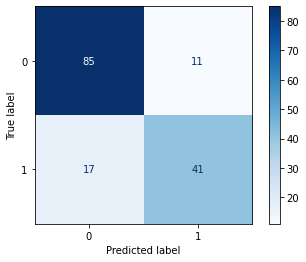

In [874]:
print("Random Forest Confusion Mastrix:\n ")
plot_confusion_matrix(clf_rdf, X_test_scaled, y_test, cmap='Blues') 

KNN Confusion Mastrix:
 


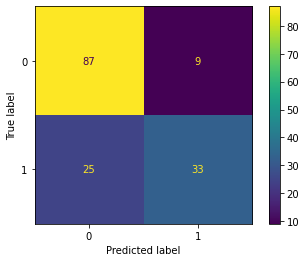

In [875]:
print("KNN Confusion Mastrix:\n ")
plot_confusion_matrix(clf_knn, X_test_scaled, y_test)  
plt.show()  

SVM Confusion Mastrix:
 


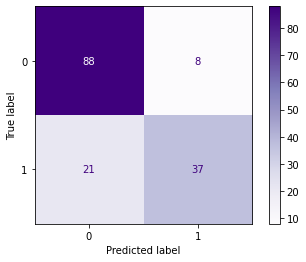

In [876]:
print("SVM Confusion Mastrix:\n ")
plot_confusion_matrix(clf_svm, X_test_scaled, y_test,cmap='Purples')  

# Variable Importances (Random Forest)

In [877]:
# Get numerical feature importances
importances = list(clf_rdf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Glucose              Importance: 0.28
Variable: BMI                  Importance: 0.18
Variable: DiabetesPedigreeFunction Importance: 0.13
Variable: Age                  Importance: 0.13
Variable: BloodPressure        Importance: 0.08
Variable: Insulin              Importance: 0.08
Variable: Pregnancies          Importance: 0.07
Variable: SkinThickness        Importance: 0.06


Text(0.5, 1.0, 'Variable Importances')

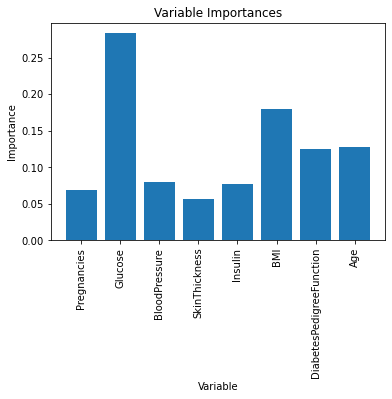

In [880]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')